In [11]:
import matplotlib.pyplot as plt
import matplotlib

import aplpy
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import math as m
import scipy.optimize as opt
import statistics as st

matplotlib.rcParams.update({'font.size': 25})
matplotlib.rcParams['figure.figsize'] = (15, 7)


In [3]:
hill_data = fits.getdata('fits_files/VelaC_500_hill_regs_regrid_30as_pix.fits', ext = 0)
p_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_p.fits', ext=0)
polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits', ext = 0)
S_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_S.fits', ext = 0)
var_polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_var_polint.fits', ext=0)

In [4]:
mask2 = np.logical_and(hill_data==2, polint_data>3*np.sqrt(var_polint_data))
mask3 = np.logical_and(hill_data==3, polint_data>3*np.sqrt(var_polint_data))
mask4 = np.logical_and(hill_data==4, polint_data>3*np.sqrt(var_polint_data))
mask5 = np.logical_and(hill_data==5, polint_data>3*np.sqrt(var_polint_data))

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)

In [5]:
mask = np.logical_and(hill_data>0, polint_data>3*np.sqrt(var_polint_data))
s = S_data[np.logical_not(np.isnan(S_data))]
s_median = np.logical_and(S_data<st.median(s), mask)

i_good = mask.nonzero()
p_good = p_data[i_good]

In [6]:
s_good = p_data[s_median]

/var/folders/lp/bh247h21459_r2sf0dzyrx_w0000gn/T/ipykernel_73838/1554208811.py:10: RuntimeWarning: invalid value encountered in arccos
  gammas = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good]
/var/folders/lp/bh247h21459_r2sf0dzyrx_w0000gn/T/ipykernel_73838/1554208811.py:11: RuntimeWarning: invalid value encountered in arccos
  gammap = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]


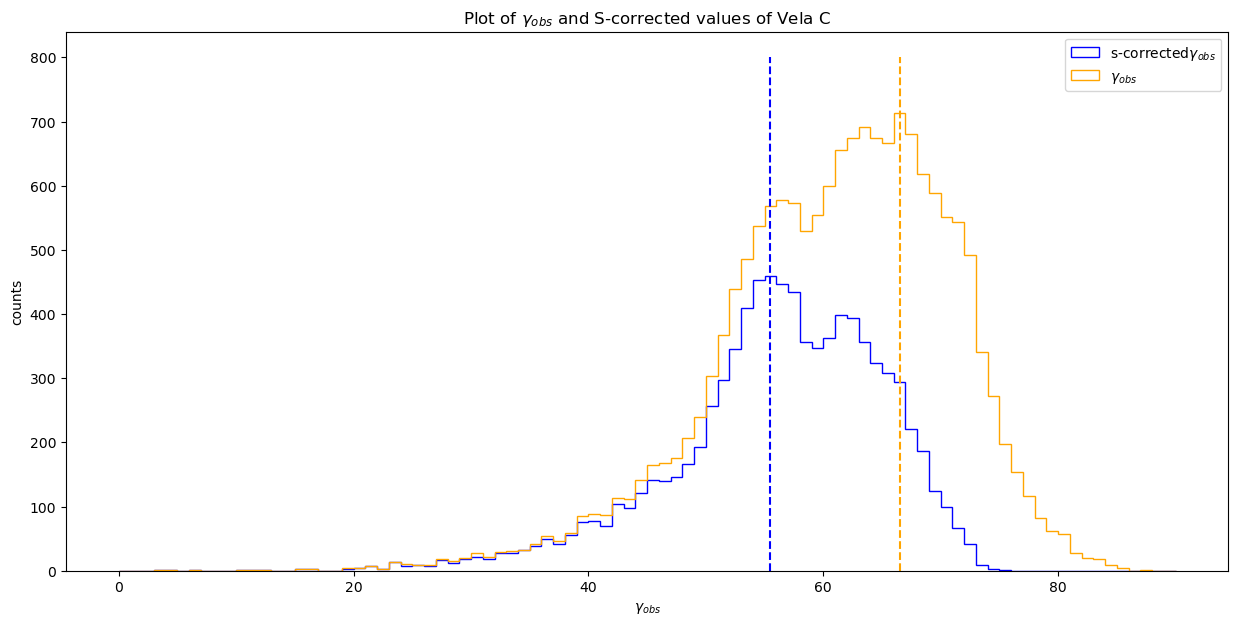

In [7]:
plt.figure(figsize = (15, 7))
y = np.linspace(0,800)
xs = [55.5]*len(y)
xp = [66.5]*len(y)
mxs = [st.median(s)*180/np.pi]*len(y)
mxp = [st.median(p_good)*180/np.pi]*len(y)

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gammas = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good]
gammap = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]

hists, bins, patches = plt.hist(gammas, 90, range= (0,90), color = 'blue', histtype = 'step', label = 's-corrected$\gamma_{obs}$')
histp, bins, patches = plt.hist(gammap, 90, range= (0,90), color = 'orange', histtype = 'step', label = '$\gamma_{obs}$')
plt.plot(xs, y, '--', color = 'blue')
plt.plot(xp, y, '--', color = 'orange')

plt.legend()
plt.title('Plot of $\gamma_{obs}$ and S-corrected values of Vela C')
plt.xlabel('$\gamma_{obs}$')
plt.ylabel('counts')
plt.savefig('S-corrected')

[55.5]
[66.5]
[431.86936575  57.82253084  -7.86000829] [699.4147225   62.48279881   9.32632156]


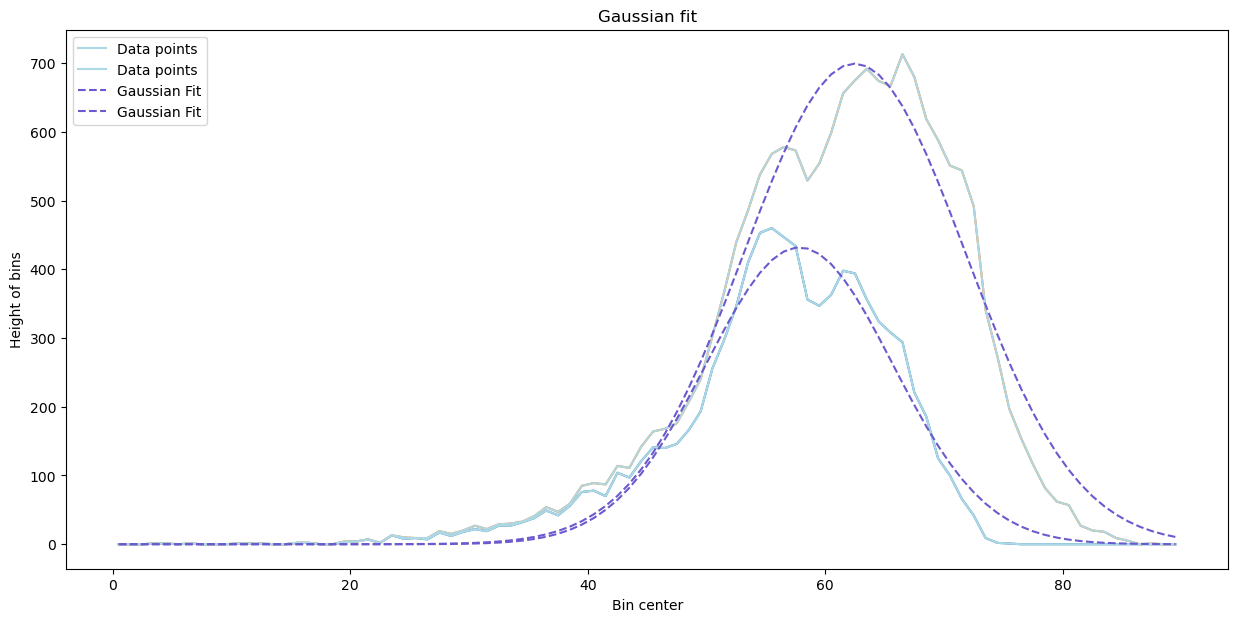

In [8]:
gausss = np.zeros(len(bins)-1)                #array of zeroes for bincenter
gaussp = np.zeros(len(bins)-1)  

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gausss[m] = (0.5*(bins[m]+bins[m+1]))
    gaussp[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gausss, hists)                        #Plotting of histogram as a line graph
plt.plot(gaussp, histp)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     
gPars,gCovs = opt.curve_fit(gaussian, gausss, hists,p0=(1,1,2))#fitting the data points
gParp,gCovp = opt.curve_fit(gaussian, gaussp, histp,p0=(1,1,2))#fitting the data points


gaussfits = gaussian(gausss, gPars[0], gPars[1], gPars[2])
gaussfitp = gaussian(gaussp, gParp[0], gParp[1], gParp[2])


#plotting the Gaussian fit
plt.plot(gausss, hists, '-', color = 'lightblue', label = 'Data points')
plt.plot(gausss, histp, '-', color = 'lightblue', label = 'Data points')
plt.plot(gaussp, gaussfits, '--',color = 'slateblue', label = 'Gaussian Fit')
plt.plot(gaussp, gaussfitp, '--',color = 'slateblue', label = 'Gaussian Fit')

plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')

print(gausss[np.where(hists == hists.max())])
print(gaussp[np.where(histp == histp.max())])

plt.grid()
print(gPars, gParp)

# 1 Center-Ridge 

6.317666119975689

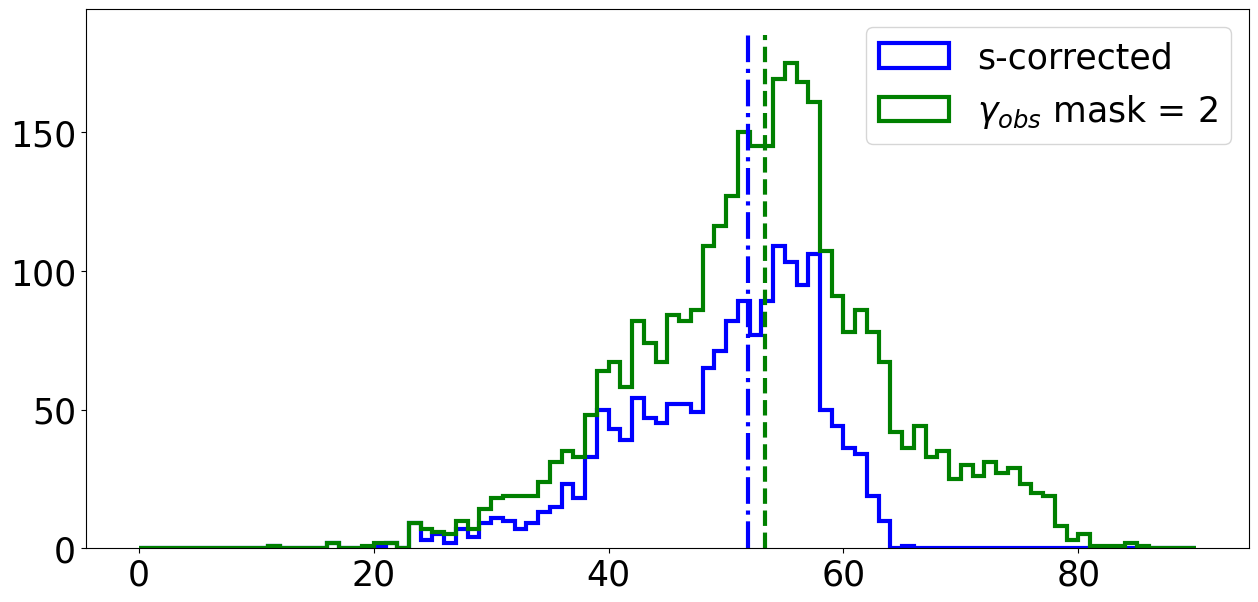

In [12]:
plt.figure(figsize = (15, 7))
y1 = np.linspace(0,185)
xs1 = [51.83370677]*len(y1)
xp1 = [53.29294057]*len(y1)

s2 = S_data[mask2]
s_median2 = np.logical_and(S_data<st.median(s2), mask2)
s_good2 = p_data[s_median2]
gammas2 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good2]
hists2, bins, patches = plt.hist(gammas2, 90, range= (0,90),  histtype = 'step', label = 's-corrected', color = 'blue', lw = 3)

i_good2 = mask2.nonzero()
p_good2 = p_data[i_good2]
gamma2 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good2]
hist2, bins, patches = plt.hist(gamma2, 90, range= (0,90), histtype = 'step', label = '$\gamma_{obs}$ mask = 2', color = 'green', lw = 3)
plt.legend()

plt.plot(xs1, y1, '-.', color = 'blue', lw = 3)
plt.plot(xp1, y1, '--', color = 'green', lw = 3)

st.median(s2)

[88.41442882 51.83372939  7.41813984] [141.33838951  53.29294057   9.06707519]


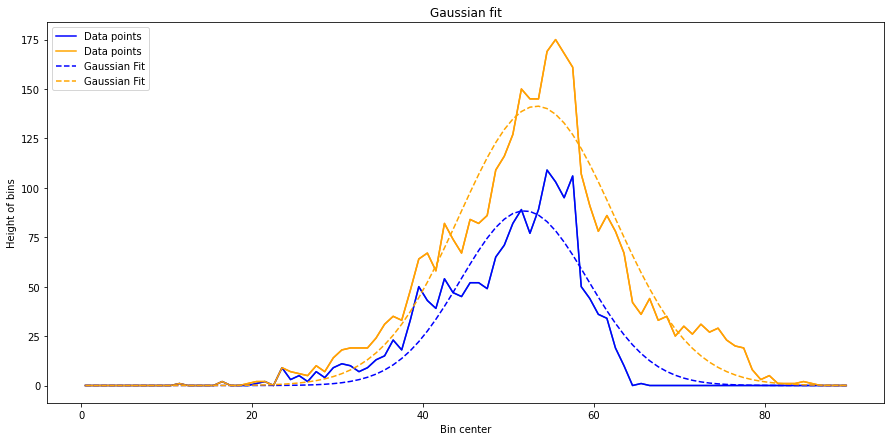

In [65]:
gausss2 = np.zeros(len(bins)-1)                #array of zeroes for bincenter
gauss2 = np.zeros(len(bins)-1)  

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gausss2[m] = (0.5*(bins[m]+bins[m+1]))
    gauss2[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gausss2, hists2)                        #Plotting of histogram as a line graph
plt.plot(gauss2, hist2)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     
gPars2,gCovs2 = opt.curve_fit(gaussian, gausss2, hists2,p0=(100,50,10))#fitting the data points
gPar2,gCov2 = opt.curve_fit(gaussian, gauss2, hist2,p0=(150,50,10))#fitting the data points


gaussfits2 = gaussian(gausss2, gPars2[0], gPars2[1], gPars2[2])
gaussfit2 = gaussian(gauss2, gPar2[0], gPar2[1], gPar2[2])


#plotting the Gaussian fit
plt.plot(gausss2, hists2, '-', color = 'blue', label = 'Data points')
plt.plot(gauss2, hist2, '-', color = 'orange', label = 'Data points')
plt.plot(gausss2, gaussfits2, '--',color = 'blue', label = 'Gaussian Fit')
plt.plot(gauss2, gaussfit2, '--',color = 'orange', label = 'Gaussian Fit')

plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')

plt.grid()

print(gPars2, gPar2)

# 2 Center-Nest

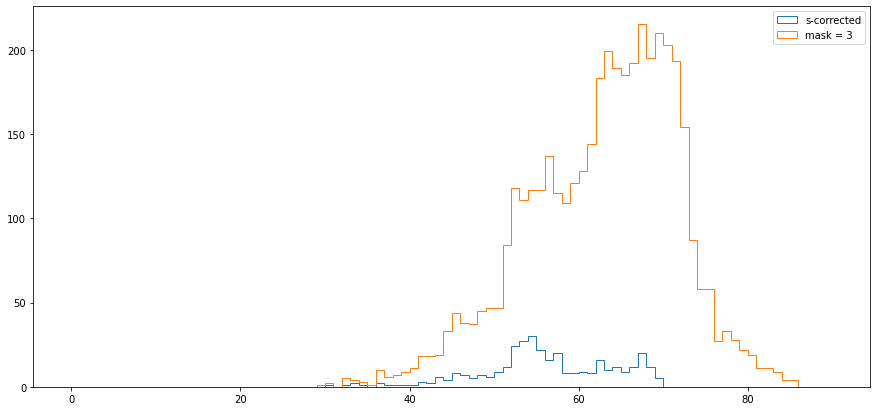

In [66]:
plt.figure(figsize = (15, 7))

s3 = S_data[mask3]

s_median3 = np.logical_and(S_data<st.median(s3), mask3)
s_good3 = p_data[s_median3]
gammas3 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good3]
hists3, bins, patches = plt.hist(gammas3, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good3 = mask3.nonzero()
p_good3 = p_data[i_good3]
gamma3 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good3]
hist3, bins, patches = plt.hist(gamma3, 90, range= (0,90), histtype = 'step', label = 'mask = 3')
plt.legend()

[18.00709959 56.49772367  7.71370449] [193.32490503  64.45060642   8.55739367]


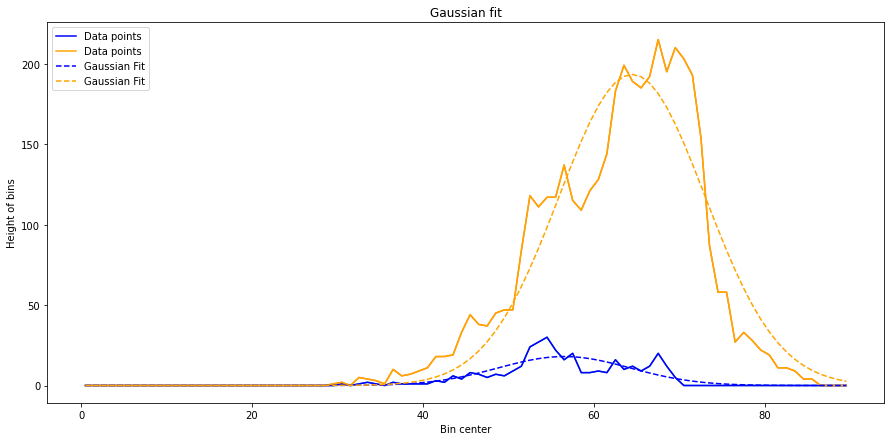

In [67]:
gausss3 = np.zeros(len(bins)-1)                #array of zeroes for bincenter
gauss3 = np.zeros(len(bins)-1)  

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gausss3[m] = (0.5*(bins[m]+bins[m+1]))
    gauss3[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gausss3, hists3)                        #Plotting of histogram as a line graph
plt.plot(gauss3, hist3)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     
gPars3,gCovs3 = opt.curve_fit(gaussian, gausss3, hists3,p0=(150,60,10))#fitting the data points
gPar3,gCov3 = opt.curve_fit(gaussian, gauss3, hist3,p0=(200,60,10))#fitting the data points


gaussfits3 = gaussian(gausss3, gPars3[0], gPars3[1], gPars3[2])
gaussfit3 = gaussian(gauss3, gPar3[0], gPar3[1], gPar3[2])


#plotting the Gaussian fit
plt.plot(gausss3, hists3, '-', color = 'blue', label = 'Data points')
plt.plot(gauss3, hist3, '-', color = 'orange', label = 'Data points')
plt.plot(gausss3, gaussfits3, '--',color = 'blue', label = 'Gaussian Fit')
plt.plot(gauss3, gaussfit3, '--',color = 'orange', label = 'Gaussian Fit')

plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')

plt.grid()
print(gPars3, gPar3)

# 3 South-Ridge

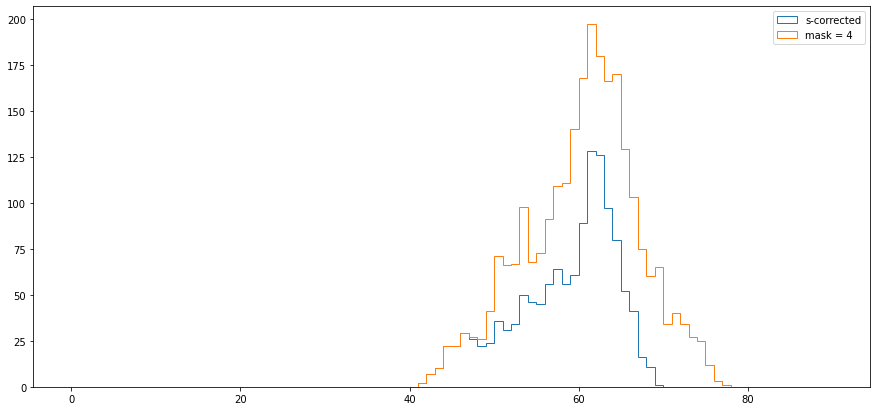

In [68]:
plt.figure(figsize = (15, 7))

s4 = S_data[mask4]
s_median4 = np.logical_and(mask4, S_data<st.median(s4))
s_good4 = p_data[s_median4]
gammas4 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good4]
hists4, bins, patches = plt.hist(gammas4, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good4 = mask4.nonzero()
p_good4 = p_data[i_good4]
gamma4 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good4]
hist4, bins, patches = plt.hist(gamma4, 90, range= (0,90), histtype = 'step', label = 'mask = 4')
plt.legend()

[94.12939433 60.63500259  4.95610512] [158.7939125   61.30569814   6.26604496]


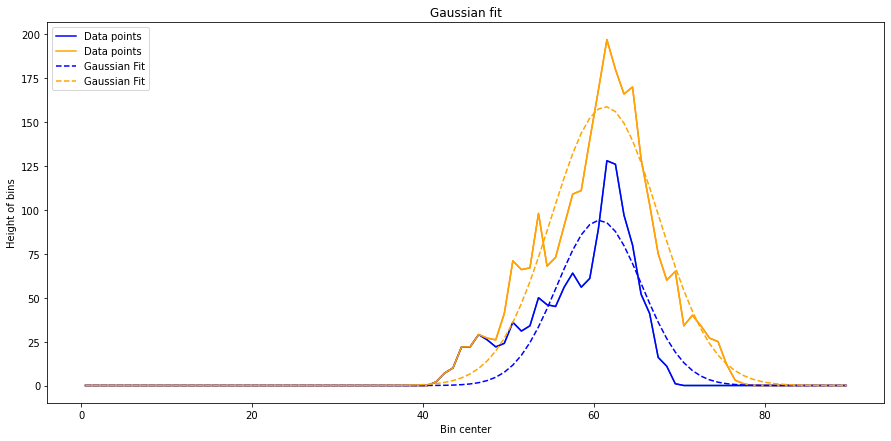

In [69]:
gausss4 = np.zeros(len(bins)-1)                #array of zeroes for bincenter
gauss4 = np.zeros(len(bins)-1)  

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gausss4[m] = (0.5*(bins[m]+bins[m+1]))
    gauss4[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gausss4, hists4)                        #Plotting of histogram as a line graph
plt.plot(gauss4, hist4)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     
gPars4,gCovs4 = opt.curve_fit(gaussian, gausss4, hists4 ,p0=(150,60,10))#fitting the data points
gPar4,gCov4 = opt.curve_fit(gaussian, gauss4, hist4 ,p0=(200,60,10))#fitting the data points


gaussfits4 = gaussian(gausss4, gPars4[0], gPars4[1], gPars4[2])
gaussfit4 = gaussian(gauss4, gPar4[0], gPar4[1], gPar4[2])


#plotting the Gaussian fit
plt.plot(gausss4, hists4, '-', color = 'blue', label = 'Data points')
plt.plot(gauss4, hist4, '-', color = 'orange', label = 'Data points')
plt.plot(gausss4, gaussfits4, '--',color = 'blue', label = 'Gaussian Fit')
plt.plot(gauss4, gaussfit4, '--',color = 'orange', label = 'Gaussian Fit')

plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')

plt.grid()
print(gPars4, gPar4)

# 3 South-Nest

<ipython-input-70-b1dd8ec7f937>:6: RuntimeWarning: invalid value encountered in arccos
  gammas5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good5]
<ipython-input-70-b1dd8ec7f937>:11: RuntimeWarning: invalid value encountered in arccos
  gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]


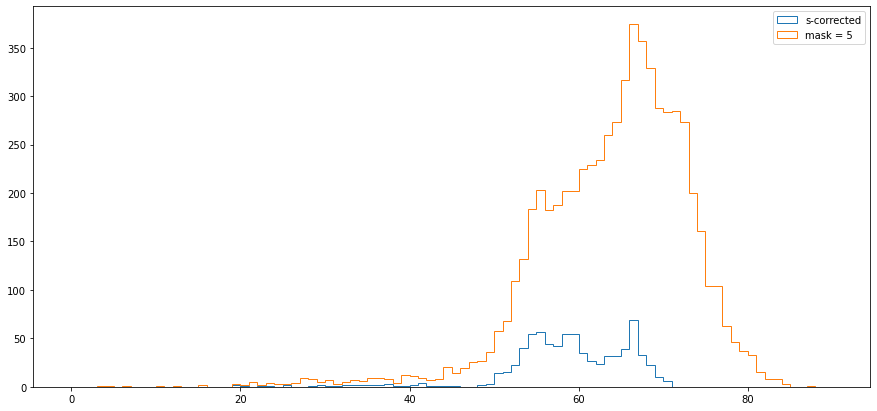

In [70]:
plt.figure(figsize = (15, 7))

s5 = S_data[mask5]
s_median5 = np.logical_and(S_data<st.median(s5), mask5)
s_good5 = p_data[s_median5]
gammas5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good5]
hists5, bins, patches = plt.hist(gammas5, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good5 = mask5.nonzero()
p_good5 = p_data[i_good5]
gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]
hist5, bins, patches = plt.hist(gamma5, 90, range= (0,90), histtype = 'step', label = 'mask = 5')
plt.legend()

[48.5246692  59.60142869  6.38055042] [318.15345139  65.55524579   7.8824713 ]


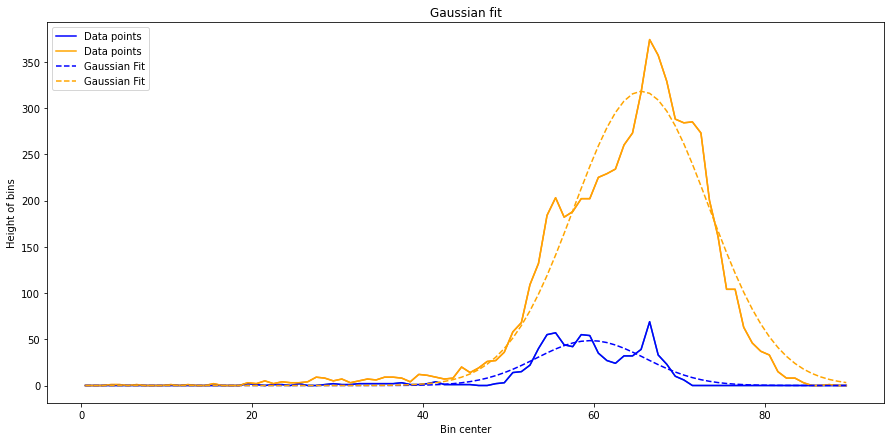

In [71]:
gausss5 = np.zeros(len(bins)-1)                #array of zeroes for bincenter
gauss5 = np.zeros(len(bins)-1)  

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gausss5[m] = (0.5*(bins[m]+bins[m+1]))
    gauss5[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gausss5, hists5)                        #Plotting of histogram as a line graph
plt.plot(gauss5, hist5)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     
gPars5,gCovs5 = opt.curve_fit(gaussian, gausss5, hists5 ,p0=(150,60,10))#fitting the data points
gPar5,gCov5 = opt.curve_fit(gaussian, gauss5, hist5 ,p0=(200,60,10))#fitting the data points


gaussfits5 = gaussian(gausss5, gPars5[0], gPars5[1], gPars5[2])
gaussfit5 = gaussian(gauss5, gPar5[0], gPar5[1], gPar5[2])


#plotting the Gaussian fit
plt.plot(gausss5, hists5, '-', color = 'blue', label = 'Data points')
plt.plot(gauss5, hist5, '-', color = 'orange', label = 'Data points')
plt.plot(gausss5, gaussfits5, '--',color = 'blue', label = 'Gaussian Fit')
plt.plot(gauss5, gaussfit5, '--',color = 'orange', label = 'Gaussian Fit')

plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')

plt.grid()
print(gPars5, gPar5)

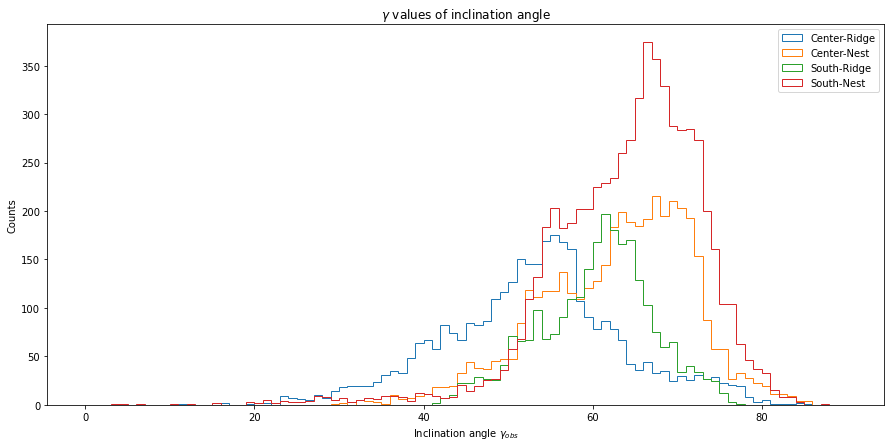

In [74]:
hist2, bins, patches = plt.hist(gamma2, 90, range= (0,90),  histtype = 'step', label = 'Center-Ridge')
hist3, bins, patches = plt.hist(gamma3, 90, range= (0,90),  histtype = 'step', label = 'Center-Nest')
hist4, bins, patches = plt.hist(gamma4, 90, range= (0,90),  histtype = 'step', label = 'South-Ridge')
hist5, bins, patches = plt.hist(gamma5, 90, range= (0,90),  histtype = 'step', label = 'South-Nest')
plt.xlabel('Inclination angle $\gamma_{obs}$')
plt.ylabel('Counts')
plt.title('$\gamma$ values of inclination angle')
plt.legend()

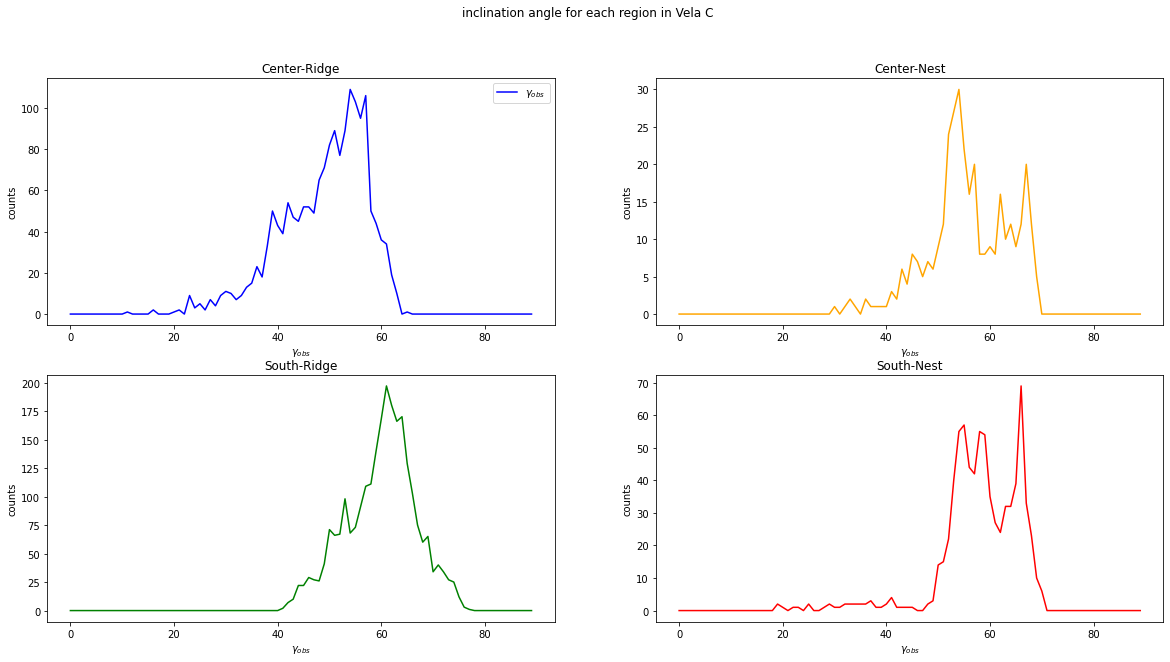

In [73]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))
axs[0, 0].plot(hists2, color = 'blue', label = '$\gamma_{obs}$')
#axs[0, 0].plot(x1, y1, '--', color = 'blue')
axs[0, 0].set_title('Center-Ridge')
axs[0, 0].legend()

#axs[0, 1].plot(x2, y2, '--', color = 'orange')
axs[0, 1].plot(hists3, color = 'orange')
axs[0, 1].set_title('Center-Nest')
#axs[1, 0].plot(x3, y3, '--', color = 'green')
axs[1, 0].plot(hist4, color = 'green')
axs[1, 0].set_title('South-Ridge')
#axs[1, 1].plot(x4, y4, '--', color = 'red')
axs[1, 1].plot(hists5, color = 'red')
axs[1, 1].set_title('South-Nest')
fig.suptitle('inclination angle for each region in Vela C')


for ax in axs.flat:
    ax.set(xlabel='$\gamma_{obs}$', ylabel='counts')